In [139]:
%load_ext autoreload
%autoreload 2

from tqdm import tqdm
import numpy as np
from myTransRec import TransRec
from utils import train_test_split, preprocess_data, get_batches
from torch import nn
import torch.optim as optim
import torch
from torch.autograd import Variable

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
dfPath = '/Users/jiji/RS_project/df_cutted.csv'
data, id2user, user2id, id2poi, poi2id = preprocess_data(dfPath)
n_users = len(id2user); n_poi = len(id2poi)

train_data, test_data, train_POIs = train_test_split(data)

n_pairs = sum(map(len, train_data.values()))

In [51]:
EMBEDDING_DIM = 100
LEARNING_RATE = 0.001
EPOCHS = 20000
BATCH_SIZE = 1024
LAMBDA = 0.05
NUM_SAMPLED = 16
print(f'TRAIN SIZE: {n_pairs*NUM_SAMPLED}')

TRAIN SIZE: 1191984


In [140]:
model = TransRec(EMBEDDING_DIM, user2id, id2user, poi2id, id2poi)
criterion = nn.LogSigmoid()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=LAMBDA)

In [174]:
for i in range(EPOCHS):

    batches = list(get_batches(train_data, train_POIs, BATCH_SIZE, NUM_SAMPLED, n_poi))
    step = 0
    batch_num = len(batches)
    loss = .0
    for batch in batches:
        user_id, prev_id, pos_id, neg_id = map(torch.LongTensor, batch)
        optimizer.zero_grad()
        objective = model(user_id, prev_id, pos_id, neg_id)
        _loss = - criterion(objective).sum()
        _loss.backward()
        optimizer.step()
        loss+=_loss.data.numpy()

        step+=1
        if step%200 == 0:
            print("Epoch: [{}/{}] Batch: [{}/{}]".format(i+1, EPOCHS, step, batch_num))
    print("At Epoch: [{}/{}] [Loss]: [{}]\n".format(i+1, EPOCHS, loss))

Epoch: [1/20000] Batch: [200/1161]
Epoch: [1/20000] Batch: [400/1161]
Epoch: [1/20000] Batch: [600/1161]
Epoch: [1/20000] Batch: [800/1161]
Epoch: [1/20000] Batch: [1000/1161]
At Epoch: [1/20000] [Loss]: [221849.60194301605]

Epoch: [2/20000] Batch: [200/1161]
Epoch: [2/20000] Batch: [400/1161]
Epoch: [2/20000] Batch: [600/1161]
Epoch: [2/20000] Batch: [800/1161]
Epoch: [2/20000] Batch: [1000/1161]
At Epoch: [2/20000] [Loss]: [221901.53003120422]

Epoch: [3/20000] Batch: [200/1160]
Epoch: [3/20000] Batch: [400/1160]
Epoch: [3/20000] Batch: [600/1160]
Epoch: [3/20000] Batch: [800/1160]
Epoch: [3/20000] Batch: [1000/1160]
At Epoch: [3/20000] [Loss]: [221700.23823547363]

Epoch: [4/20000] Batch: [200/1161]
Epoch: [4/20000] Batch: [400/1161]
Epoch: [4/20000] Batch: [600/1161]
Epoch: [4/20000] Batch: [800/1161]
Epoch: [4/20000] Batch: [1000/1161]
At Epoch: [4/20000] [Loss]: [221474.7320652008]

Epoch: [5/20000] Batch: [200/1161]
Epoch: [5/20000] Batch: [400/1161]
Epoch: [5/20000] Batch: [60

Epoch: [36/20000] Batch: [1000/1161]
At Epoch: [36/20000] [Loss]: [221654.6666278839]

Epoch: [37/20000] Batch: [200/1161]
Epoch: [37/20000] Batch: [400/1161]
Epoch: [37/20000] Batch: [600/1161]
Epoch: [37/20000] Batch: [800/1161]
Epoch: [37/20000] Batch: [1000/1161]
At Epoch: [37/20000] [Loss]: [221720.76834392548]

Epoch: [38/20000] Batch: [200/1160]
Epoch: [38/20000] Batch: [400/1160]
Epoch: [38/20000] Batch: [600/1160]
Epoch: [38/20000] Batch: [800/1160]
Epoch: [38/20000] Batch: [1000/1160]
At Epoch: [38/20000] [Loss]: [221663.85682678223]

Epoch: [39/20000] Batch: [200/1161]
Epoch: [39/20000] Batch: [400/1161]
Epoch: [39/20000] Batch: [600/1161]
Epoch: [39/20000] Batch: [800/1161]
Epoch: [39/20000] Batch: [1000/1161]
At Epoch: [39/20000] [Loss]: [221693.8347015381]

Epoch: [40/20000] Batch: [200/1161]
Epoch: [40/20000] Batch: [400/1161]
Epoch: [40/20000] Batch: [600/1161]
Epoch: [40/20000] Batch: [800/1161]
Epoch: [40/20000] Batch: [1000/1161]
At Epoch: [40/20000] [Loss]: [221381.

Epoch: [72/20000] Batch: [400/1161]
Epoch: [72/20000] Batch: [600/1161]
Epoch: [72/20000] Batch: [800/1161]
Epoch: [72/20000] Batch: [1000/1161]
At Epoch: [72/20000] [Loss]: [221438.73739624023]

Epoch: [73/20000] Batch: [200/1160]
Epoch: [73/20000] Batch: [400/1160]
Epoch: [73/20000] Batch: [600/1160]
Epoch: [73/20000] Batch: [800/1160]
Epoch: [73/20000] Batch: [1000/1160]
At Epoch: [73/20000] [Loss]: [221288.16122436523]

Epoch: [74/20000] Batch: [200/1161]
Epoch: [74/20000] Batch: [400/1161]
Epoch: [74/20000] Batch: [600/1161]
Epoch: [74/20000] Batch: [800/1161]
Epoch: [74/20000] Batch: [1000/1161]
At Epoch: [74/20000] [Loss]: [221253.6579208374]

Epoch: [75/20000] Batch: [200/1161]
Epoch: [75/20000] Batch: [400/1161]
Epoch: [75/20000] Batch: [600/1161]
Epoch: [75/20000] Batch: [800/1161]
Epoch: [75/20000] Batch: [1000/1161]
At Epoch: [75/20000] [Loss]: [221168.2443780899]

Epoch: [76/20000] Batch: [200/1161]
Epoch: [76/20000] Batch: [400/1161]
Epoch: [76/20000] Batch: [600/1161]
Ep

KeyboardInterrupt: 

Их алгоритм

In [28]:
orig_data_path = '/Users/jiji/Desktop/GitHub/TransRec/src/meta_data.npy'
dataset=np.load(orig_data_path, allow_pickle=True)

([User,
  # Item,
  usermap,
  itemmap,
  usernum,
  itemnum])\
    =dataset

In [29]:
userVecPath = '/Users/jiji/Desktop/GitHub/TransRec/src/userVector.npy'
itemVecPath = '/Users/jiji/Desktop/GitHub/TransRec/src/itemVector.npy'
itemBiasPath = '/Users/jiji/Desktop/GitHub/TransRec/src/itemBias.npy'
userGlobalPath = '/Users/jiji/Desktop/GitHub/TransRec/src/userGlobal.npy'

userGlobal = np.load(userGlobalPath)
userVec = np.load(userVecPath)
itemVec = np.load(itemVecPath)
itemBias = np.load(itemBiasPath)
itemBias = - itemBias
itemBias = np.sqrt(itemBias.max() - itemBias)
itemVecB = np.c_[itemVec, itemBias]

from sklearn.neighbors import NearestNeighbors
KNN = NearestNeighbors(n_neighbors=50, algorithm='ball_tree')
KNN.fit(itemVecB)

NearestNeighbors(algorithm='ball_tree', n_neighbors=50)

In [30]:
id2user_orig = {val:key for key, val in usermap.items()}
id2poi_orig = {val:key for key, val in itemmap.items()}

In [31]:
def orig_predict(user_id, pre_poi):
    z = itemVec[pre_poi]+userVec[user_id] + userGlobal
    z = np.append(z, 0)
#     return z
    _, indices = KNN.kneighbors(z[None])
    indices = indices[0]
    indices = indices[indices!=pre_poi]
    indices
    return indices

In [42]:
import pandas as pd
dfPath = '/Users/jiji/RS_project/df_cutted.csv'
df = pd.read_csv(dfPath)
popular = df.groupby('location')['user'].apply(lambda x:
                len(set(x))).sort_values(ascending=False).keys().to_numpy()

In [180]:
# HIT@k
results= []
hits = [5,10, 15, 20, 25, 30]
hits = [30, 40, 50, 60]
for k in hits:
# k = 5
    k_most_pop = popular[:k]
    k_most_pop = np.array(list(map(lambda x: poi2id[x], k_most_pop.tolist())))
    hitTrans = []
    hitPop = []
    hitOrig = []
    for user in tqdm(test_data):
        orig_user = usermap[id2user_orig[user]]

        prev, ground = test_data[user][0]
        orig_prev = itemmap[id2poi_orig[prev]]
        orig_ground = itemmap[id2poi_orig[ground]]

        hitTrans.append(ground in model.predict(user, prev)[:k])
        hitPop.append(ground in k_most_pop)
        hitOrig.append(orig_ground in orig_predict(orig_user, orig_prev)[:k])

#     print 

    a = (np.array(hitTrans).mean())
#     print
    b = (np.array(hitPop).mean())
#     print
    c = (np.array(hitOrig).mean())
    results.append((a,b, c))

100%|██████████| 16275/16275 [00:20<00:00, 784.42it/s]


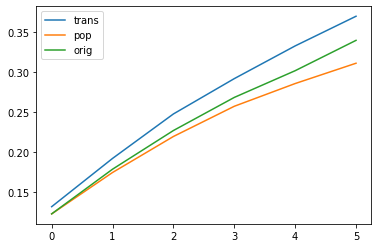

In [176]:
import matplotlib.pyplot as plt
trans, pop, orig = list(zip(*results))
plt.plot(trans, label='trans')
plt.plot(pop, label='pop')
plt.plot(orig, label='orig')
plt.legend();